<font face="Calibri" size="2"> <i>Spacesense client library - sample  usage</i>
</font>

--------

# Sentinel 1 analysis ready data

--------

**Short description**

This notebook introduces spacesense sentinel 1 analysis ready data.
- Installation
- Computation
- Processing result and scene metadata
- Data access and visualization 
  - whole period
  - per date 

--------



### 0 - Install Spacesense Client Library and dependencies

In [ ]:
!pip  install -U spacesense

### 1 - Import spacesense object(s) and other dependencies

In [2]:
from spacesense.collections import Sentinel1

### 2 - Configure the API Key by setting the `SS_API_KEY` environment variable

In [ ]:
# Don't push your API key on git
import os
from getpass import getpass
api_key = getpass('Enter your api key : ')
os.environ["SS_API_KEY"] = api_key

### 3 - Define AOI, TOI, output options

In [3]:
# Define the AOI
aoi = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {},
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [0.8813095092773438, 43.549730075980946],
                        [0.8828544616699219, 43.54584194571407],
                        [0.8934545516967773, 43.54618411124182],
                        [0.8920812606811523, 43.55237386130279],
                        [0.8813095092773438, 43.549730075980946],
                    ]
                ],
            },
        }
    ],
}


# Define the TOI
start_date = "2021-10-12"
end_date = "2021-10-14"

# Get an instance of Sentinel1 object
sentinel1 = Sentinel1(id="s1_ard_no_mosaic")

# Enable to save S1 ARD data in local files
sentinel1.enable_local_output(local_output_path="./generated")


### 4 - Compute S1 ARD for the requested AOI and TOI

Computation is done in spacesense backend, execution time will depends on the backend configuration

In [4]:
s1_ard_result = sentinel1.compute_ard(aoi, start_date, end_date)

### 5 - Computation status and scene metadata

Visualize the status of the computation for all available dates

In [5]:
s1_ard_result.status

date   status reason                                     file_path
0  2021-10-13  success   None  ./generated/s1_ard_no_mosaic/2021-10-13.tiff
1  2021-10-12  success   None  ./generated/s1_ard_no_mosaic/2021-10-12.tiff

Get all scene metadata for all days in a dataframe. Remove `as_dataframe` param, if you want a dictionary.

In [6]:
s1_ard_result.get_scene_metadata(as_dataframe = True)

date swathidentifier  \
0  2021-10-13              IW   
1  2021-10-12              IW   

                                           link_icon  lastorbitnumber  \
0  https://apihub.copernicus.eu/apihub/odata/v1/P...          40104.0   
1  https://apihub.copernicus.eu/apihub/odata/v1/P...          40082.0   

                                           footprint  \
0  MULTIPOLYGON (((0.481684 42.401455, 3.606338 4...   
1  MULTIPOLYGON (((2.844197 42.022491, 3.252309 4...   

                                                link  \
0  https://apihub.copernicus.eu/apihub/odata/v1/P...   
1  https://apihub.copernicus.eu/apihub/odata/v1/P...   

                      instrumentname  missiondatatakeid orbitdirection  \
0  Synthetic Aperture Radar (C-band)           311222.0      ASCENDING   
1  Synthetic Aperture Radar (C-band)           311021.0     DESCENDING   

                ingestiondate  ... platformname polarisationmode  \
0  2021-10-13T18:54:36.392000  ...   Sentinel-1            VV VH   
1  2021-10-12T07:39:15.819000  ...   Sentinel-1            VV VH   

                                            filename  \
0  S1A_IW_GRDH_1SDV_20211013T174733_20211013T1747...   
1  S1A_IW_GRDH_1SDV_20211012T060109_20211012T0601...   

                                             summary slicenumber  \
0  Date: 2021-10-13T17:47:33.449Z, Instrument: SA...         4.0   
1  Date: 2021-10-12T06:01:09.857Z, Instrument: SA...        21.0   

                                        gmlfootprint  \
0  <gml:Polygon srsName="http://www.opengis.net/g...   
1  <gml:Polygon srsName="http://www.opengis.net/g...   

                  endposition  \
0  2021-10-13T17:47:58.448000   
1  2021-10-12T06:01:34.856000   

                                    link_alternative  ondemand  \
0  https://apihub.copernicus.eu/apihub/odata/v1/P...     false   
1  https://apihub.copernicus.eu/apihub/odata/v1/P...     false   

                beginposition  
0  2021-10-13T17:47:33.449000  
1  2021-10-12T06:01:09.857000  

[2 rows x 36 columns]

### 6 - Use S1 ARD as an Xarray Dataset to access data and visualize

Convert to an xarray dataset

In [7]:
dataset = s1_ard_result.dataset
dataset

<xarray.Dataset>
Dimensions:  (x: 268, time: 2, y: 72)
Coordinates:
  * x        (x) float64 0.8814 0.8814 0.8815 0.8815 ... 0.8933 0.8934 0.8934
  * y        (y) float64 43.55 43.55 43.55 43.55 ... 43.55 43.55 43.55 43.55
  * time     (time) datetime64[ns] 2021-10-13 2021-10-12
Data variables:
    vh       (time, y, x) float32 0.0 nan 0.0 nan 0.0 ... 0.0 nan 0.0 nan 0.0
    vv       (time, y, x) float32 0.0 nan 0.0 nan 0.0 ... 0.0 nan 0.0 nan 0.0
    lia      (time, y, x) float32 0.0 nan 0.0 nan 0.0 ... 0.0 nan 0.0 nan 0.0
    mask     (time, y, x) float32 0.0 nan 0.0 nan 0.0 ... 0.0 nan 0.0 nan 0.0
Attributes:
    transform:       (8.983152841195341e-05, 0.0, 0.8813820410138685, 0.0, -8...
    crs:             +init=epsg:4326
    res:             (8.983152841195341e-05, 8.983152841194128e-05)
    is_tiled:        0
    nodatavals:      (nan, nan, nan, nan)
    scales:          (1.0, 1.0, 1.0, 1.0)
    offsets:         (0.0, 0.0, 0.0, 0.0)
    descriptions:    ('vh', 'vv', 'lia', 'mask')
    AREA_OR_POINT:   Area
    scene_metadata:  [{'title': 'S1A_IW_GRDH_1SDV_20211013T174733_20211013T17...

Visualize vh, vv, lia for all dates

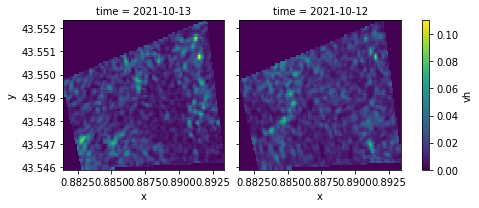

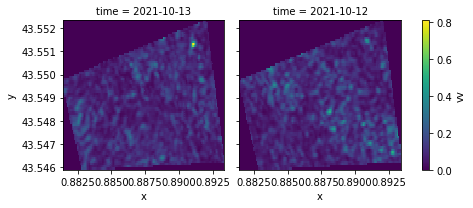

In [8]:
dataset.vh.plot(col="time")
dataset.vv.plot(col="time")
dataset.lia.plot(col="time")

Access specific band for a sub period

In [9]:
dataset.sel(time="2021-10").vh

<xarray.DataArray 'vh' (time: 2, y: 72, x: 268)>
array([[[ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        ...,
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan]],

       [[nan,  0., nan, ...,  0., nan,  0.],
        [nan,  0., nan, ...,  0., nan,  0.],
        [nan,  0., nan, ...,  0., nan,  0.],
        ...,
        [nan,  0., nan, ...,  0., nan,  0.],
        [nan,  0., nan, ...,  0., nan,  0.],
        [nan,  0., nan, ...,  0., nan,  0.]]], dtype=float32)
Coordinates:
  * x        (x) float64 0.8814 0.8814 0.8815 0.8815 ... 0.8933 0.8934 0.8934
  * y        (y) float64 43.55 43.55 43.55 43.55 ... 43.55 43.55 43.55 43.55
  * time     (time) datetime64[ns] 2021-10-13 2021-10-12

Access a specific band for a specific date

In [10]:
dataset.sel(time="2021-10-13").vv

<xarray.DataArray 'vv' (time: 1, y: 72, x: 268)>
array([[[ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        ...,
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan],
        [ 0., nan,  0., ..., nan,  0., nan]]], dtype=float32)
Coordinates:
  * x        (x) float64 0.8814 0.8814 0.8815 0.8815 ... 0.8933 0.8934 0.8934
  * y        (y) float64 43.55 43.55 43.55 43.55 ... 43.55 43.55 43.55 43.55
  * time     (time) datetime64[ns] 2021-10-13

### 7 - Reuse the computation result from a previous run

It is possible to load the computation result from a previous run by providing it's computation id.

In [ ]:
result = Sentinel1.load_ard_from_local(id="s1_ard_no_mosaic")
result.dataset